# LVDT Voice Coil Simulation Plots
### Analyse the voice coil measurement of a reversed LVDT with geometry as used in ETpathfinder large IP. 

#### Import everything

In [1]:
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read in data
[0] = positions, 
[1] = upper outer coil forces,
[2] = lower outer coil forces, 
[3] = magnet forces
[4] = meta data: NSteps, StepSize, OutCoil_Current

In [16]:
files = ['RevLVDT_VC_DC_1A_RSpro_40mm_single_layer.out',
         'RevLVDT_VC_DC_0p1A_RSpro_40mm_single_layer.out']



legends = ['1A','0.1A'
          ]


inputdata = []
NSteps = []
StepSize = []
MIRCoil_Current = []

for i in range(0,len(files)):
    inputarray = np.loadtxt(files[i])
    inputdata.append(inputarray)
    NSteps.append(int(inputarray[3][0]))
    StepSize.append(inputarray[3][1])
    MIRCoil_Current.append(inputarray[3][2]) 

print(inputdata)
print(NSteps)
print(StepSize)
print(MIRCoil_Current)

[array([[-2.00000000e+01, -1.90000000e+01, -1.80000000e+01,
        -1.70000000e+01, -1.60000000e+01, -1.50000000e+01,
        -1.40000000e+01, -1.30000000e+01, -1.20000000e+01,
        -1.10000000e+01, -1.00000000e+01, -9.00000000e+00,
        -8.00000000e+00, -7.00000000e+00, -6.00000000e+00,
        -5.00000000e+00, -4.00000000e+00, -3.00000000e+00,
        -2.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  3.00000000e+00,
         4.00000000e+00,  5.00000000e+00,  6.00000000e+00,
         7.00000000e+00,  8.00000000e+00,  9.00000000e+00,
         1.00000000e+01,  1.10000000e+01,  1.20000000e+01,
         1.30000000e+01,  1.40000000e+01,  1.50000000e+01,
         1.60000000e+01,  1.70000000e+01,  1.80000000e+01,
         1.90000000e+01,  2.00000000e+01],
       [ 5.01894551e-02,  4.93060493e-02,  4.79395286e-02,
         4.57263423e-02,  4.39349974e-02,  4.16091648e-02,
         3.87123564e-02,  3.61887419e-02,  3.30419252e-02,
         3.0

#### Analyse and plot output data
Basic plots:

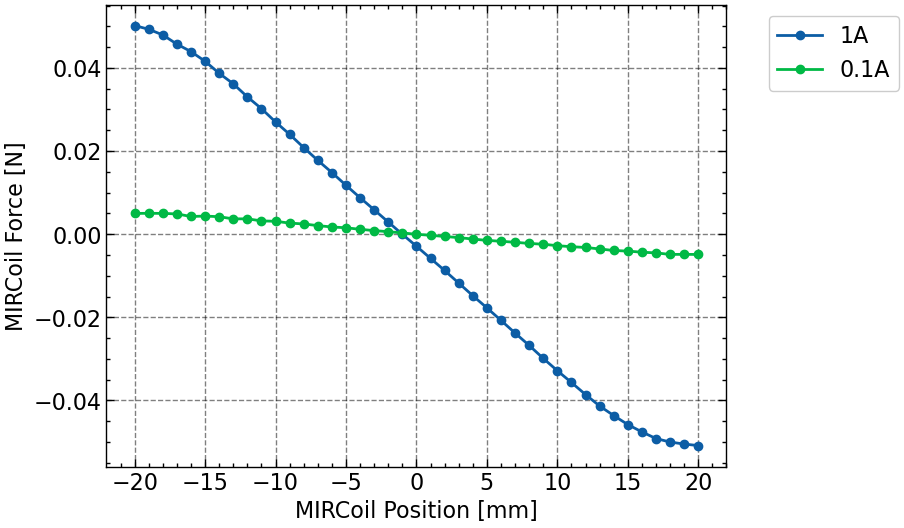

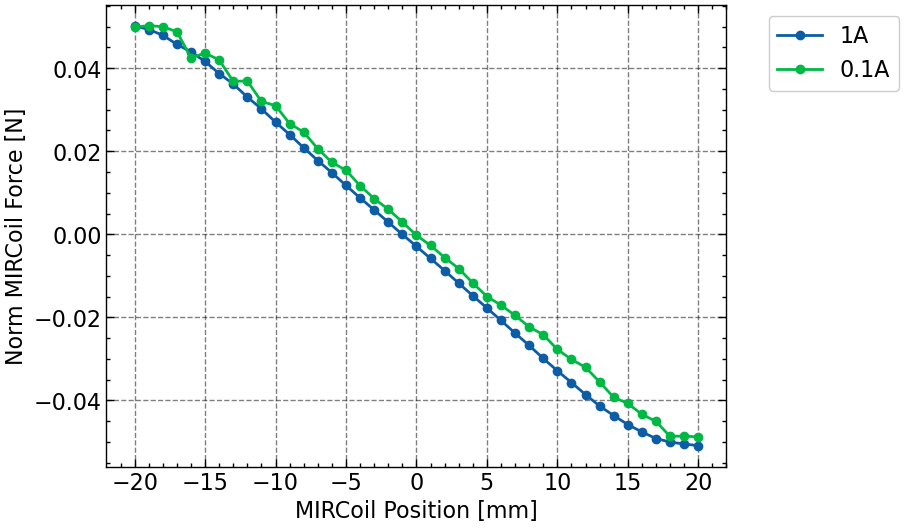

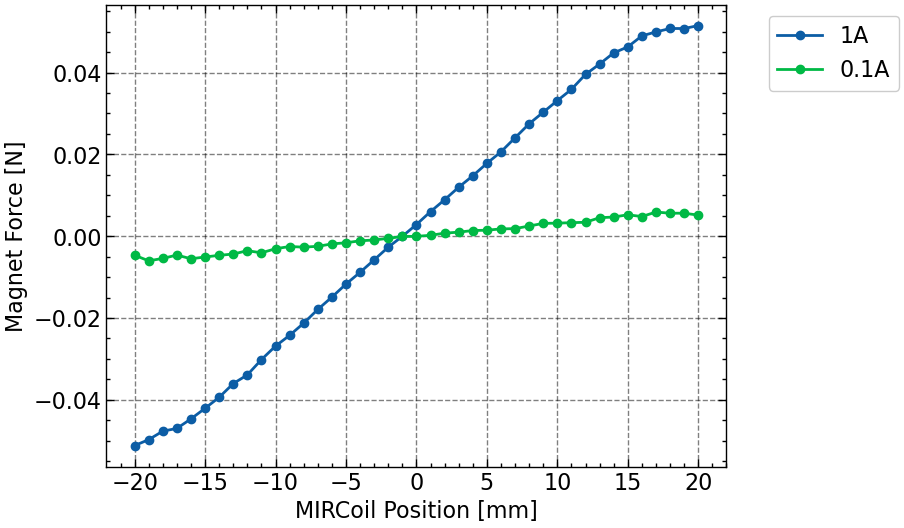

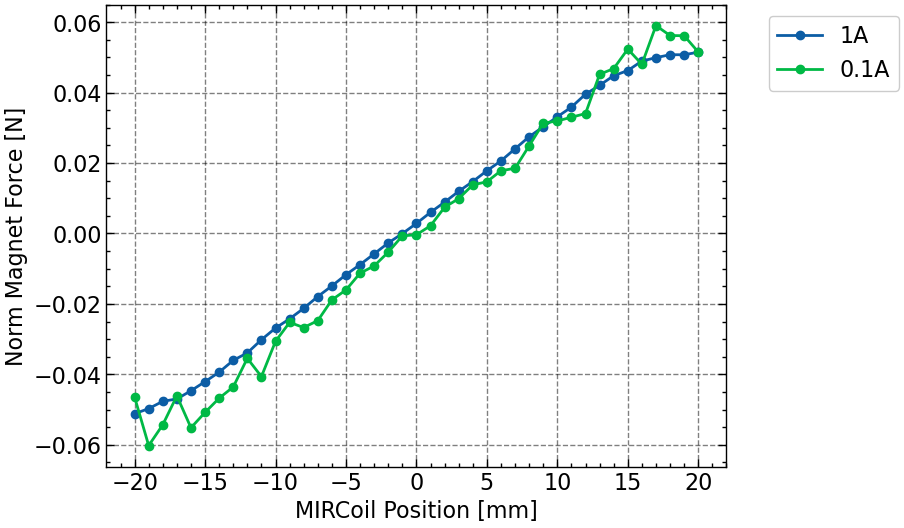

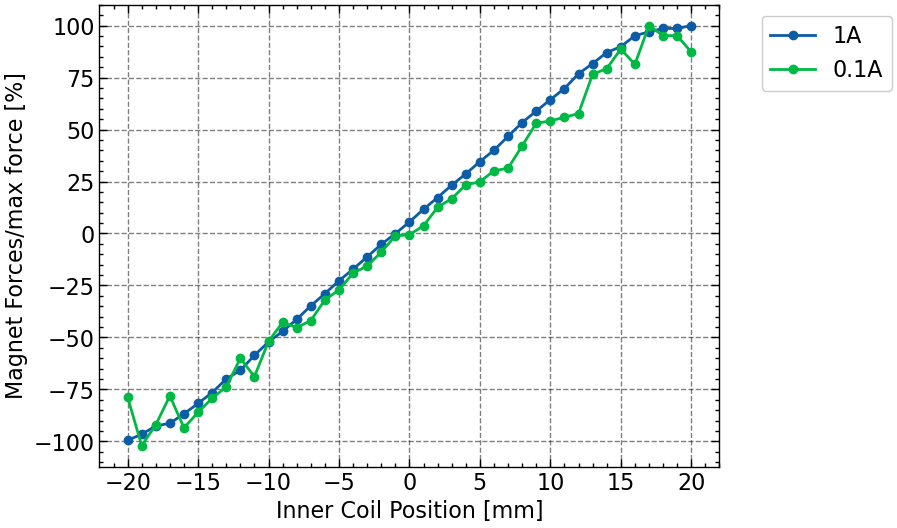

In [21]:
#print(plt.style.available)
plt.style.use(['science','grid','notebook'])

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][1], 'o-', label=legends[i])
plt.ylabel('MIRCoil Force [N]')
plt.xlabel('MIRCoil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
# plt.legend()
plt.show()



for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2], 'o-', label=legends[i])
plt.ylabel('Magnet Force [N]')
plt.xlabel('MIRCoil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][1]/MIRCoil_Current[i], 'o-', label=legends[i])
plt.ylabel('Norm MIRCoil Force [N]')
plt.xlabel('MIRCoil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
# plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2]/MIRCoil_Current[i], 'o-', label=legends[i])
plt.ylabel('Norm Magnet Force [N]')
plt.xlabel('MIRCoil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2]/max(inputdata[i][2])*100, 'o-', label=legends[i])
plt.ylabel('Magnet Forces/max force [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#plt.legend()
plt.show()

Create normalised response of magnet forces in N/A and fit with second order polynominal.

Fitted parameters of function: [-6.21548965e-06  2.84381219e-03  3.36844217e-03]
Fitted parameters of function: [ 2.95884165e-06  3.07869168e-03 -2.56755354e-04]
Norm_Magnet_Forces: [array([-5.11945244e-02, -4.97403664e-02, -4.76710770e-02, -4.70003404e-02,
       -4.46665796e-02, -4.20851042e-02, -3.93972465e-02, -3.60365247e-02,
       -3.39157237e-02, -3.01767904e-02, -2.68699478e-02, -2.42427060e-02,
       -2.12622806e-02, -1.79106811e-02, -1.48995945e-02, -1.17140124e-02,
       -8.83490748e-03, -5.78713120e-03, -2.69097866e-03, -3.17283556e-05,
        2.84993325e-03,  6.00544311e-03,  8.90523495e-03,  1.19752994e-02,
        1.47604872e-02,  1.78083876e-02,  2.06251610e-02,  2.40552303e-02,
        2.74813629e-02,  3.03127317e-02,  3.31437693e-02,  3.58998021e-02,
        3.95610051e-02,  4.20930346e-02,  4.48189081e-02,  4.62825522e-02,
        4.89825249e-02,  4.99436259e-02,  5.07830730e-02,  5.07754230e-02,
        5.14944744e-02]), array([-0.04646913, -0.06024574, -0.05432

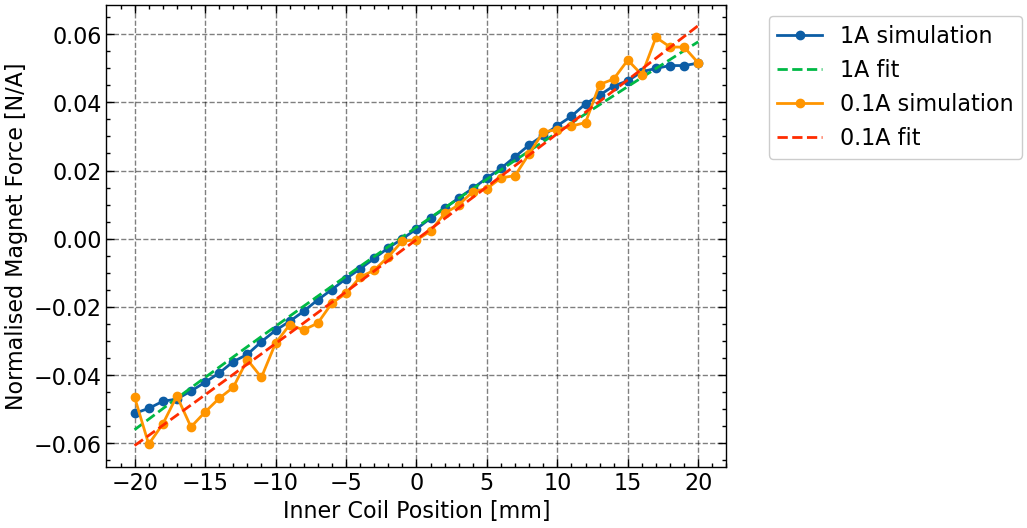

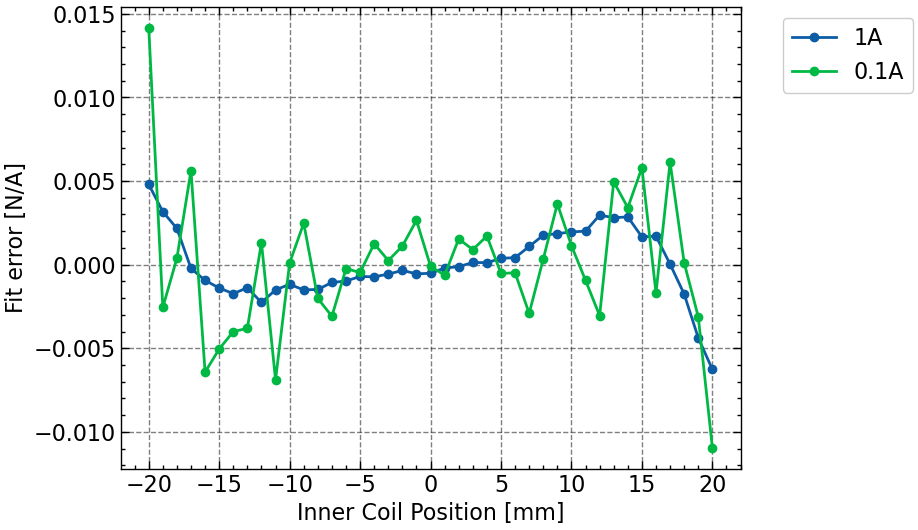

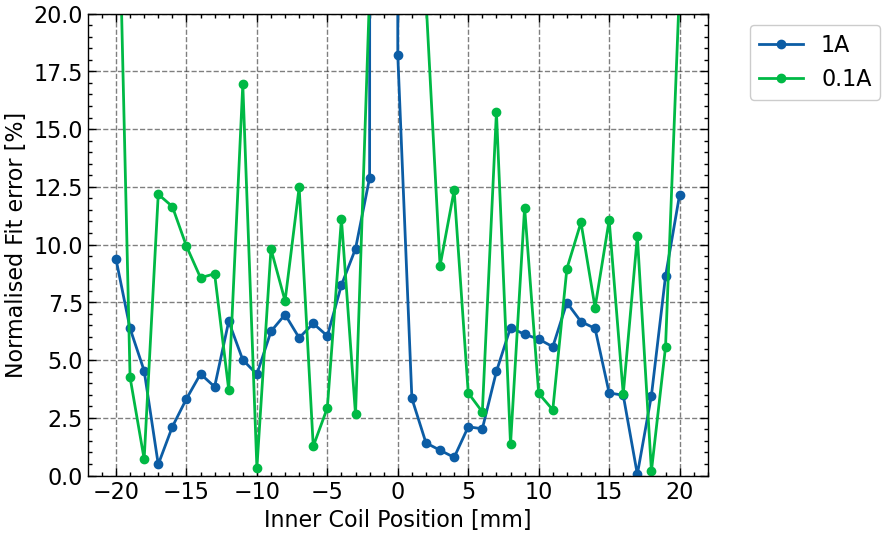

In [20]:
def polyfunc(x, a, b, c):
     return a*x**2 + b*x + c

Norm_Magnet_Forces = []
fitted_Norm_Magnet_Forces = []
for i in range(0,len(files)):
    Norm_Magnet_Forces.append(inputdata[i][2]/MIRCoil_Current[i]) 
    optimizedParameters, pcov = opt.curve_fit(polyfunc, inputdata[i][0], inputdata[i][2]/MIRCoil_Current[i])
    print("Fitted parameters of function:", optimizedParameters)
    fitted_Norm_Magnet_Forces.append(polyfunc(inputdata[i][0], *optimizedParameters))
print(f"Norm_Magnet_Forces: {Norm_Magnet_Forces}")
for i in range(0,len(files)):    
    plt.plot(inputdata[i][0], Norm_Magnet_Forces[i], 'o-', label=legends[i] + " simulation")
    plt.plot(inputdata[i][0], fitted_Norm_Magnet_Forces[i], '--', label=legends[i] + " fit")
plt.ylabel('Normalised Magnet Force [N/A]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], Norm_Magnet_Forces[i] - fitted_Norm_Magnet_Forces[i], 'o-', label=legends[i])
plt.ylabel('Fit error [N/A]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(Norm_Magnet_Forces[i] - fitted_Norm_Magnet_Forces[i])/abs(Norm_Magnet_Forces[i])*100, 'o-', label=legends[i])
plt.ylabel('Normalised Fit error [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.ylim(0.0,20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#plt.legend()
plt.show()